Import Necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Summary Statistics & Missing-Value Report

In [2]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")
print("Description of all numeric values : ")
df.describe()

Description of all numeric values : 


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [3]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
print("Check for missing values : ")
df.isna().sum()

Check for missing values : 


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
print("List of columns with >5% nulls : ")
null_percent = df.isna().mean() * 100  #calculating null values percentage
null_percent[null_percent > 5]         #extracting those with percentages greater than 5

List of columns with >5% nulls : 


Comments    100.0
dtype: float64

Outlier Detection & Basic Cleaning

In [6]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# --- Calculate z-scores ---

for c in key_cols:

    df[c + '_z'] = stats.zscore(df[c], nan_policy='omit')

# --- Identify outlier rows ---

outliers = df[(df[[c + '_z' for c in key_cols]].abs() > 3).any(axis=1)]

# --- Replace outliers in the main df with median values ---

for col in key_cols:

    median_val = df[col].median()

    # Find rows (by index) where that column's z-score is > 3

    mask = df[col + '_z'].abs() > 3

    # Replace those outlier values with the column median

    df.loc[mask, col] = median_val

print("Outliers replaced per column:")

print((df[[c + '_z' for c in key_cols]].abs() > 3).sum())



Outliers replaced per column:
GHI_z        305
DNI_z       1062
DHI_z       3415
ModA_z       137
ModB_z       206
WS_z        3510
WSgust_z    3915
dtype: int64


In [7]:
# There are no missing values on those key_cols
df[key_cols] = df[key_cols].apply(lambda x: x.fillna(x.median()))
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,GHI_z,DNI_z,DHI_z,ModA_z,ModB_z,WS_z,WSgust_z
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,24.7,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-1.003710,-1.131165
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,24.7,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-0.866974,-0.865570
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,24.7,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.971808
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,24.7,24.4,NaN,-0.718549,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.865570
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,24.7,24.4,NaN,-0.718549,-0.602727,-0.743956,-0.71261,-0.713042,-0.730237,-0.865570


In [8]:
df.to_csv('../data/togo-dapaong_qc_clean.csv', index=False)


Time Series Analysis

c:\Users\mihret.mekbebe\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


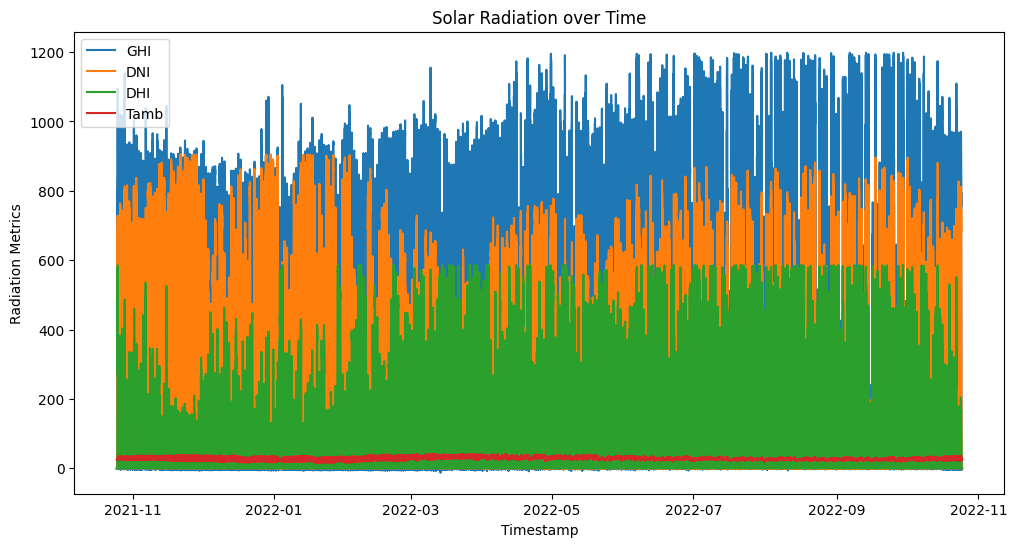

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

# Line plots of key metrics
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.legend()
plt.title('Solar Radiation over Time')
plt.xlabel('Timestamp')
plt.ylabel('Radiation Metrics')
plt.show()


C:\Users\mihret.mekbebe\AppData\Local\Temp\ipykernel_18068\4108571805.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Timestamp').resample('M').mean()


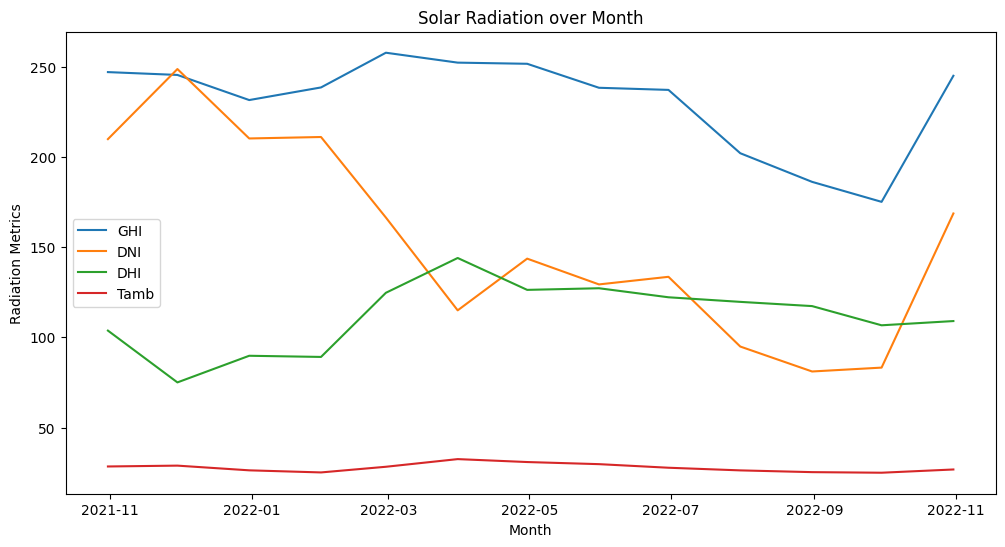

In [10]:
df_monthly = df.set_index('Timestamp').resample('M').mean()

df_monthly = df_monthly.reset_index()
# Line plots of key metrics
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Timestamp'], df_monthly['GHI'], label='GHI')
plt.plot(df_monthly['Timestamp'], df_monthly['DNI'], label='DNI')
plt.plot(df_monthly['Timestamp'], df_monthly['DHI'], label='DHI')
plt.plot(df_monthly['Timestamp'], df_monthly['Tamb'], label='Tamb')
plt.legend()
plt.title('Solar Radiation over Month')
plt.xlabel('Month')
plt.ylabel('Radiation Metrics')
plt.show()


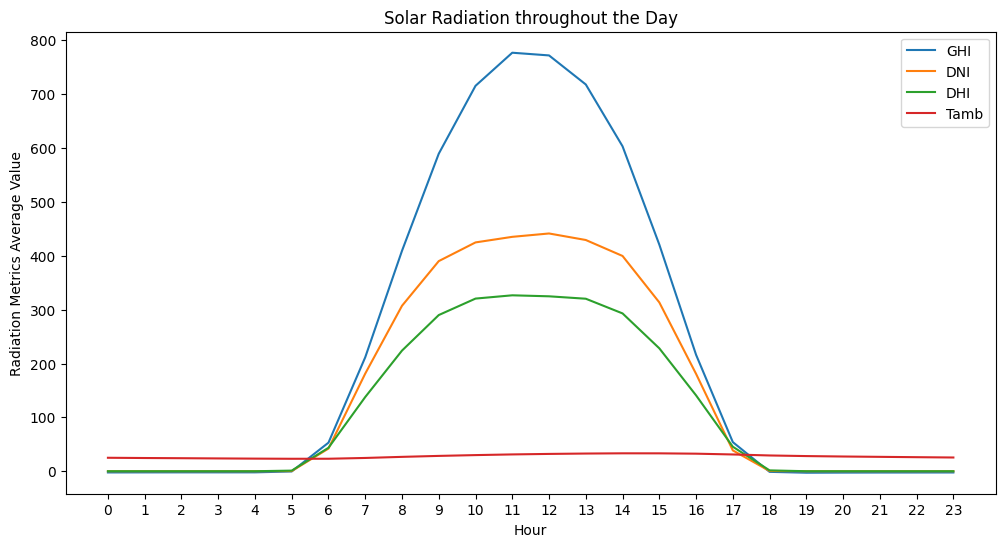

In [11]:

# Extract the hour from each timestamp
df['hour'] = df['Timestamp'].dt.hour

# Average all measurements for each hour of the day
hourly_pattern = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_pattern.index, hourly_pattern['GHI'], label='GHI')
plt.plot(hourly_pattern.index, hourly_pattern['DNI'], label='DNI')
plt.plot(hourly_pattern.index, hourly_pattern['DHI'], label='DHI')
plt.plot(hourly_pattern.index, hourly_pattern['Tamb'], label='Tamb')
plt.xticks(range(0, 24))
plt.xlabel('Hour')
plt.ylabel('Radiation Metrics Average Value')
plt.title('Solar Radiation throughout the Day')
plt.legend()
plt.show()
 

Cleaning Impact

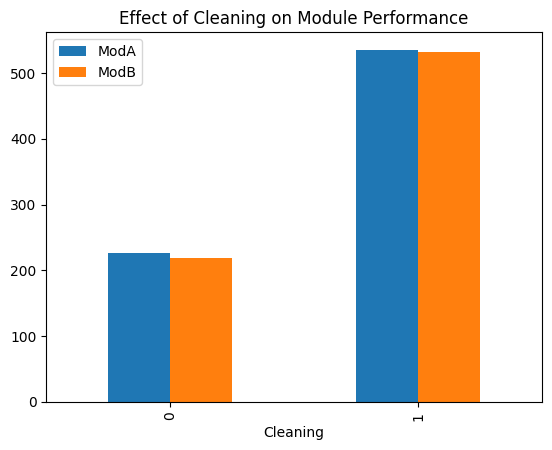

In [12]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on Module Performance')
plt.show()


Correlation & Relationship Analysis

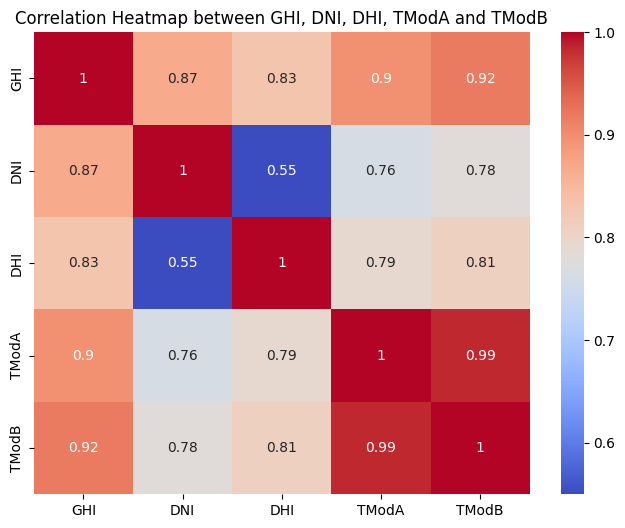

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between GHI, DNI, DHI, TModA and TModB')
plt.show()


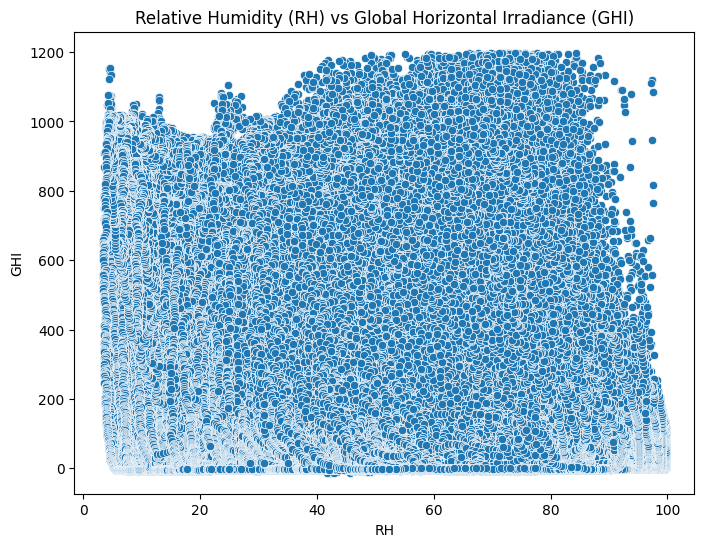

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)')
plt.show()


Wind & Distribution Analysis

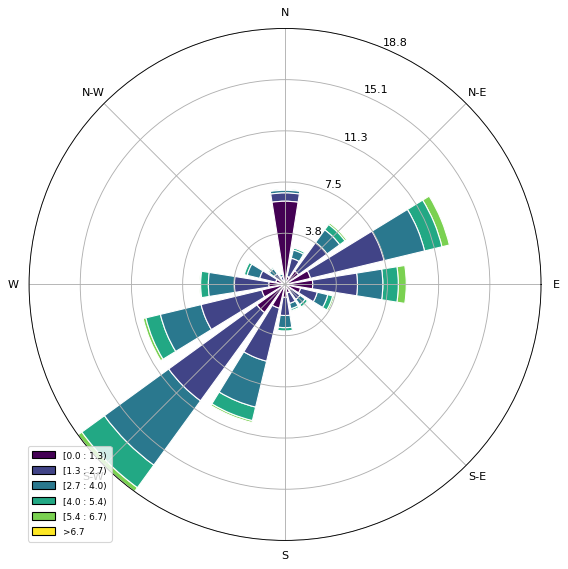

In [15]:
#!pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


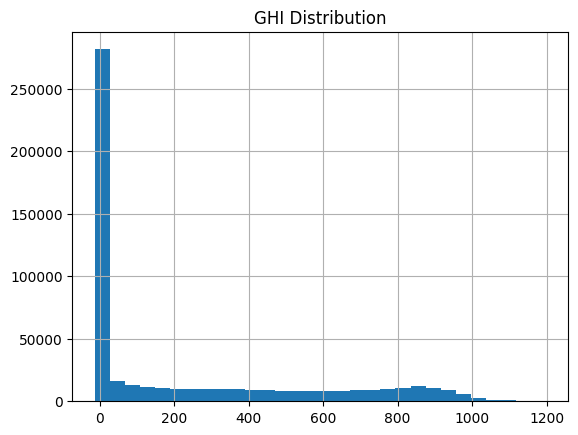

In [16]:
df['GHI'].hist(bins=30)
plt.title('GHI Distribution')
plt.show()


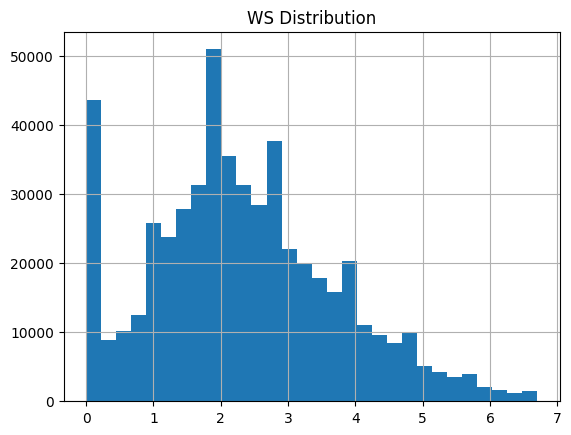

In [17]:
df['WS'].hist(bins=30)
plt.title('WS Distribution')
plt.show()


Temperature Analysis

c:\Users\mihret.mekbebe\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


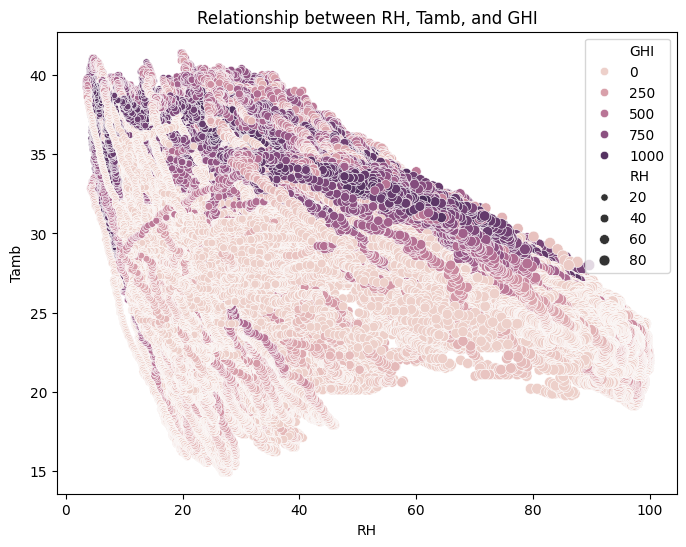

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH', y='Tamb', hue='GHI', size='RH', data=df)
plt.title('Relationship between RH, Tamb, and GHI')
plt.show()


Bubble Chart

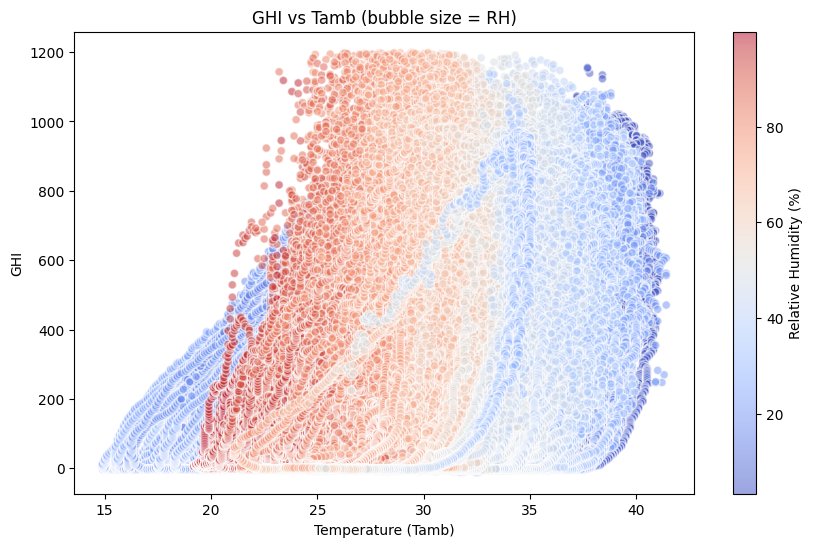

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], c=df['RH'], alpha=0.5,  cmap='coolwarm', edgecolors='w')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (bubble size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.show()
